This algorithm processes information from the market dynamics that could be uselful in spotting momentum opportunities. This is the most simple version of binary encoding for ups and downs.

[*********************100%***********************]  1 of 1 completed


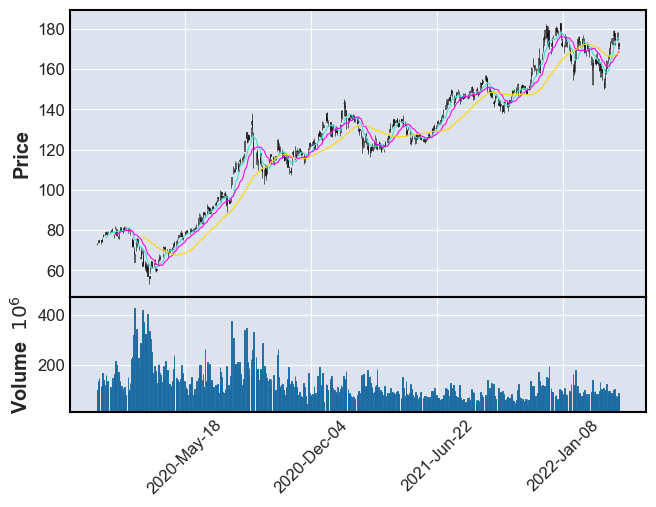

<bound method NDFrame.describe of                  Close
Date                  
2019-12-31   73.412498
2020-01-02   75.087502
2020-01-03   74.357498
2020-01-06   74.949997
2020-01-07   74.597504
...                ...
2022-04-01  174.309998
2022-04-04  178.440002
2022-04-05  175.059998
2022-04-06  171.830002
2022-04-07  172.139999

[573 rows x 1 columns]>

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime 
import yfinance as yf
import mplfinance as mpf
start_date = datetime (2020, 1, 1)
end_date = datetime(2022, 4, 8)
df = yf.download('AAPL', start=start_date, end=end_date)
mpf.plot(df, type='candle',mav=(10,20,50),volume=True, show_nontrading=True)
close = df["Close"]
close = pd.DataFrame(data= close)
close.describe

In [4]:
daily_returns = close.pct_change()
sd = daily_returns.describe(include='all').loc['std']
mu = daily_returns.describe(include='all').loc['mean']
minv = daily_returns.describe(include='all').loc['min']
maxv = daily_returns.describe(include='all').loc['max']

daily_returns.describe(include='all')

,Close
count,572.000000
mean,0.001757
std,0.023101
min,-0.128647
25%,-0.009272
50%,0.001165
75%,0.014203
max,0.119808


In [5]:
 dr= daily_returns 
dr= dr.iloc[1: , :]  
dr

,Close
Date,
2020-01-02,0.022816
2020-01-03,-0.009722
2020-01-06,0.007968
2020-01-07,-0.004703
2020-01-08,0.016086
...,...
2022-04-01,-0.001718
2022-04-04,0.023693
2022-04-05,-0.018942


In [17]:
# Simple encoding by 1 = up movement and 0 = down movement
num = dr._get_numeric_data()

num[num < 0] = 0

num[num > 0] = 1

(num['Close'] == 0).sum(),(num['Close'] == 1).sum()


(270, 302)

In [18]:
num
#!!remove zero and dots

num['Close']= num['Close'].astype(str).apply(lambda x: x.replace('.0',''))

num

,Close
Date,
2020-01-02,1
2020-01-03,0
2020-01-06,1
2020-01-07,0
2020-01-08,1
...,...
2022-04-01,0
2022-04-04,1
2022-04-05,0


In [19]:
num_ = num.Close.value_counts()
num_

1    302
0    270
Name: Close, dtype: int64

In [20]:
import time,numpy as np
#----------------------------------------------
def plugIn(msg,w):
    # Cumpute plug-in (ML) entropy rate
    pmf=pmf1(msg,w)
    out=-sum([pmf[i]*np.log2(pmf[i]) for i in pmf])/w
    return out, pmf


#----------------------------------
def pmf1(msg,w):
    # Compute the prob mass function for a one dim discrete rv
    # len(msg) -w occurrences
    lib={}
    if not isinstance(msg,str):msg=''.join(map(str,msg))
    for i in range(w,len(msg)):
        msg_=msg[i-w:i]
        if msg_ not in lib:lib[msg_]=[i-w]
        else:lib[msg_]=lib[msg_]+[i-w]
    pmf=float(len(msg)-w)
    pmf={i:len(lib[i])/pmf for i in lib}
    return pmf


In [21]:
num['Close']

Date
2020-01-02    1
2020-01-03    0
2020-01-06    1
2020-01-07    0
2020-01-08    1
             ..
2022-04-01    0
2022-04-04    1
2022-04-05    0
2022-04-06    0
2022-04-07    1
Name: Close, Length: 572, dtype: object

In [22]:
msg = num['Close']
ent_se = plugIn(msg, w= 6)

In [23]:
ent_se

(0.9846792607684159,
 {'101011': 0.02120141342756184,
  '010111': 0.014134275618374558,
  '101111': 0.014134275618374558,
  '011110': 0.015901060070671377,
  '111100': 0.015901060070671377,
  '111001': 0.012367491166077738,
  '110011': 0.012367491166077738,
  '100110': 0.014134275618374558,
  '001101': 0.015901060070671377,
  '011011': 0.015901060070671377,
  '110110': 0.015901060070671377,
  '101100': 0.02120141342756184,
  '011001': 0.014134275618374558,
  '001100': 0.012367491166077738,
  '011000': 0.019434628975265017,
  '110001': 0.024734982332155476,
  '100011': 0.024734982332155476,
  '000111': 0.0176678445229682,
  '001110': 0.01060070671378092,
  '011101': 0.014134275618374558,
  '111010': 0.019434628975265017,
  '110101': 0.0176678445229682,
  '101010': 0.024734982332155476,
  '010101': 0.026501766784452298,
  '010100': 0.02120141342756184,
  '101000': 0.02120141342756184,
  '010000': 0.01060070671378092,
  '100001': 0.012367491166077738,
  '000010': 0.01060070671378092,
  '0

In [24]:
def lempelZiv_lib(msg):
    i,lib=1,[msg[0]]
    while i<len(msg):
        for j in range(i,len(msg)):
            msg_=msg[i:j+1].all
            if msg_ not in lib:
                lib.append(msg_)
                break
        i=j+1
    return lib

In [25]:
lz=lempelZiv_lib(msg)

In [26]:
lz

['1',
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2020-01-03    0
 Name: Close, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2020-01-06    1
 Name: Close, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2020-01-07    0
 Name: Close, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2020-01-08    1
 Name: Close, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2020-01-09    1
 Name: Close, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2020-01-10    1
 Name: Close, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2020-01-13    1
 Name: Close, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2020-01-14    0
 Name: Close, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.all of Date
 2020-

In [27]:
import numpy as np

def matchLength(msg,i,n):
    #Maximum matched length +1, with overlap
    # i>=n & len(msg)>=i+n
    subS=''
    for l in range(n):
        msg1=msg[i:i+l+1]
        for j in range(i-n,i):
            msg0=msg[j:j+l+1]
            if msg1==msg0:
                subS=msg1
                break # search for higher 1
    return len(subS)+1,subS # matched length+1
#---------------------------------------
#---------------------------------------
def konto(msg,window=None):
    '''
*Kontoyiannis' LZ entropy estimate, 2013 version (centered window)
*Inverse of the avg length of the shortest non redundant substring
*if non-redundant substrings are short, the text is highly entropic
*window==None for expanding window, in which case len(msg)%2==0
*if the end of msg is more relevant, try konto(msg[::-1])
'''
    out={'num':0,'sum':0,'subS':[]}
    if not isinstance(msg,str):msg=''.join(map(str,msg))
    if window is None:
        points=range(1,int(len(msg)/2)+1)
    else:
        window=min(window,len(msg)/2)
        points=range(window,len(msg)-window+1)
    for i in points:
        if window is None:
            l,msg_=matchLength(msg,i,i)
            out['sum']+=np.log2(i+1)/l# to aviod doeblin condition
        else:
            l,msg_=matchLength(msg,i,window)
            out['sum']+=np.log2(window+1)/l# to avoid Doeblin condition
        out['subS'].append(msg_)
        out['num']+=1
    out['h']=out['sum']/out['num']
    out['r']=1-out['h']/np.log2(len(msg))# redundancy, 0<=r<=1
    return out

#--------------------------------------
if __name__=='__main__':
    msg=msg
    print(konto(msg*2))
    print(konto(msg+msg[::-1]))


{'num': 572, 'sum': 322.1208939268176, 'subS': ['1', '', '0', '1100', '10011', '0011', '011', '11', '1111111', '111111', '11111', '1111', '111', '1100', '100', '00', '000', '001111', '01111', '111100', '11100', '11001111', '1001111', '00111100', '0111100', '11110000111100', '1110000111100', '110000111100', '10000111100', '0000111100', '000111100', '0011110000', '011110000', '11110000', '1110000', '110000', '10000', '0000', '00000', '00001111', '0001111', '00111111', '0111111', '11111100', '1111100', '11110011', '1110011', '1100110011', '100110011', '00110011', '0110011', '1100110011001100', '100110011001100', '00110011001100', '0110011001100', '110011001100', '10011001100', '0011001100', '011001100', '11001100', '1001100', '001100', '01100', '11000000', '1000000', '000000', '0000000', '00000011', '0000011', '000011', '00011', '00110000', '0110000', '11000011', '1000011', '00001100', '0001100', '00110011000000', '0110011000000', '110011000000', '10011000000', '0011000000', '011000000', 